## K-Means Implementation on Shop dataset

#### Load the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [2]:
data = pd.read_csv('shop.csv')

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


### Distribution of data

C:\Users\dasam\AppData\Local\Temp\ipykernel_2020\3942210969.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


Text(0, 0.5, 'Count')

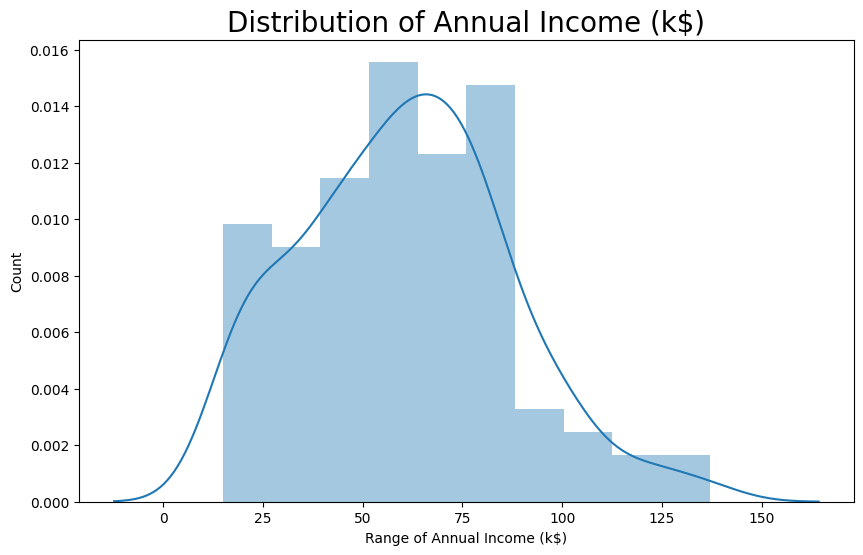

In [9]:
# Distribution of Annual Income

plt.figure(figsize = (10, 6))
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

C:\Users\dasam\AppData\Local\Temp\ipykernel_2020\1528946924.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


Text(0, 0.5, 'Count')

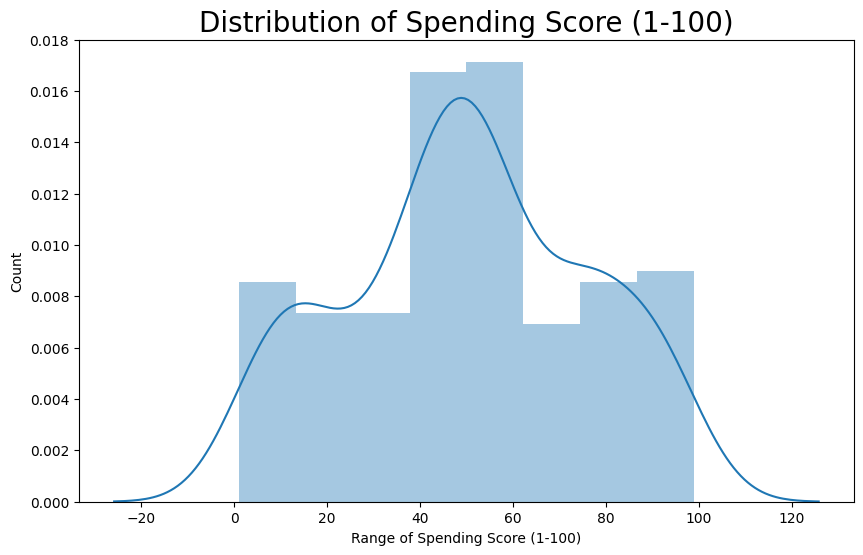

In [10]:
# Distribution of Spending Score

plt.figure(figsize = (10, 6))
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

### Gender Analysis

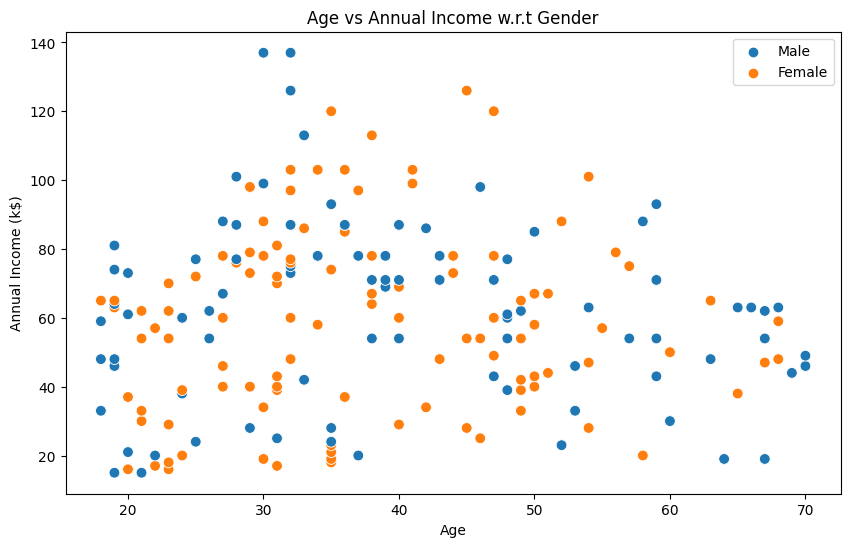

In [12]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Age' , y = 'Annual Income (k$)' , hue="Gender",data = data  ,s = 60 )
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

### Age distribution

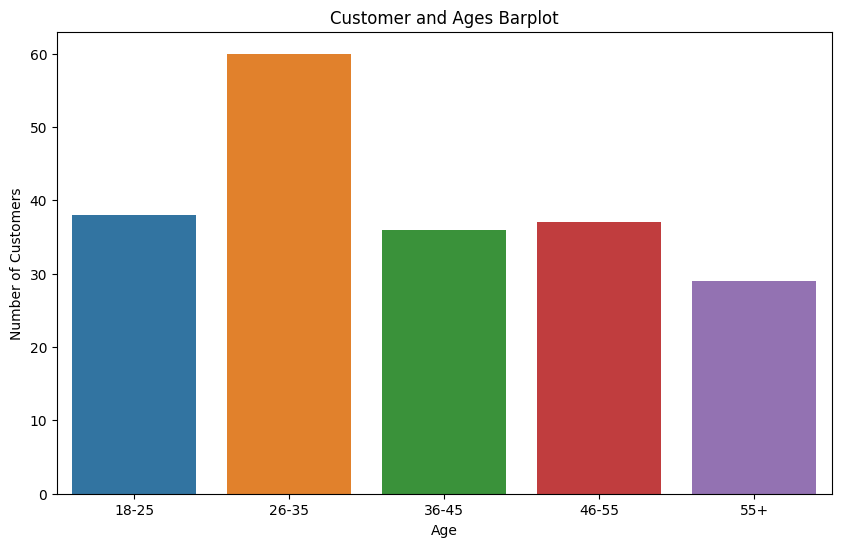

In [13]:
age18_25 = data.Age[(data.Age <= 25) & (data.Age >= 18)]
age26_35 = data.Age[(data.Age <= 35) & (data.Age >= 26)]
age36_45 = data.Age[(data.Age <= 45) & (data.Age >= 36)]
age46_55 = data.Age[(data.Age <= 55) & (data.Age >= 46)]
age55above = data.Age[data.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), 
     len(age46_55.values), len(age55above.values)]

plt.figure(figsize = (10, 6))
sns.barplot(x = x, y = y)
plt.title("Customer and Ages Barplot")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

### Clustering data based on 2 features

In [14]:
# we take just the Annual Income and Spending score
df1 = data[["CustomerID", "Gender", "Age", 
          "Annual Income (k$)", "Spending Score (1-100)"]]

X = df1[["Annual Income (k$)", "Spending Score (1-100)"]]

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Plot of the input data

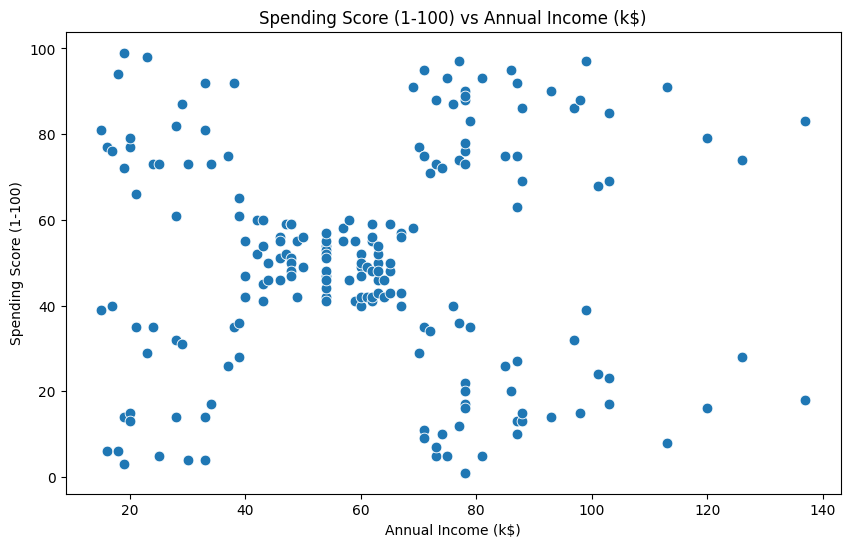

In [15]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

#### Load sklearn library

In [16]:
from sklearn.cluster import KMeans

#### Calculate the Sum of Squared Errors

In [18]:
sse = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, n_init = 'auto')
    km.fit(X)
    sse.append(km.inertia_)

#### Plot the elbow curve

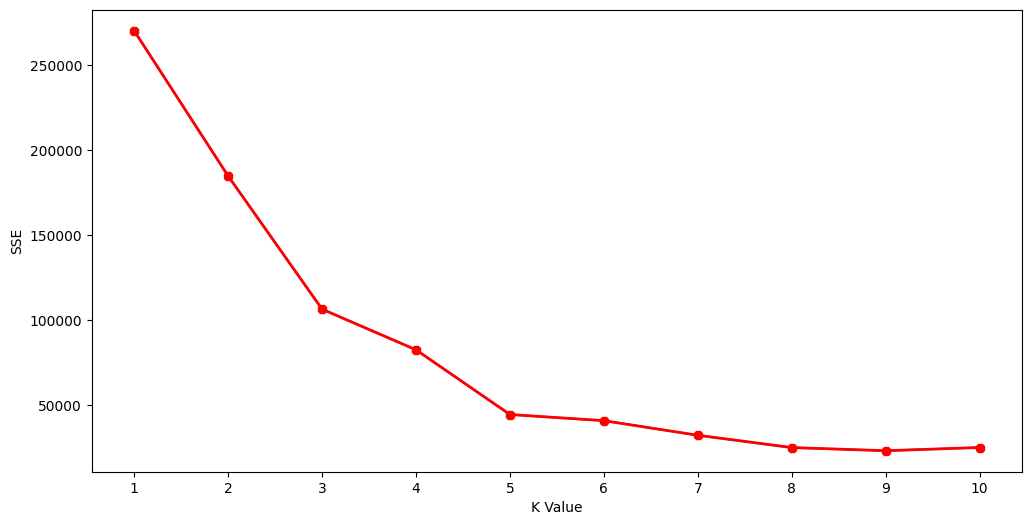

In [19]:
plt.figure(figsize = (12, 6))

plt.plot(range(1, 11), sse)

plt.plot(range(1, 11), sse, linewidth = 2, color = "red", marker = "8")

plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("SSE")

plt.show()

***We can clearly see that elbow bend is at k = 5. Therefore, we have 5 clusters***

#### Taking 5 clusters

In [20]:
km1 = KMeans(n_clusters = 5, n_init = 'auto')

# fitting the data
km1.fit(X)

# predicting the labels of the data
y = km1.predict(X)

# adding classes
df1['label'] = y

# print new data
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


#### Plot the clusters

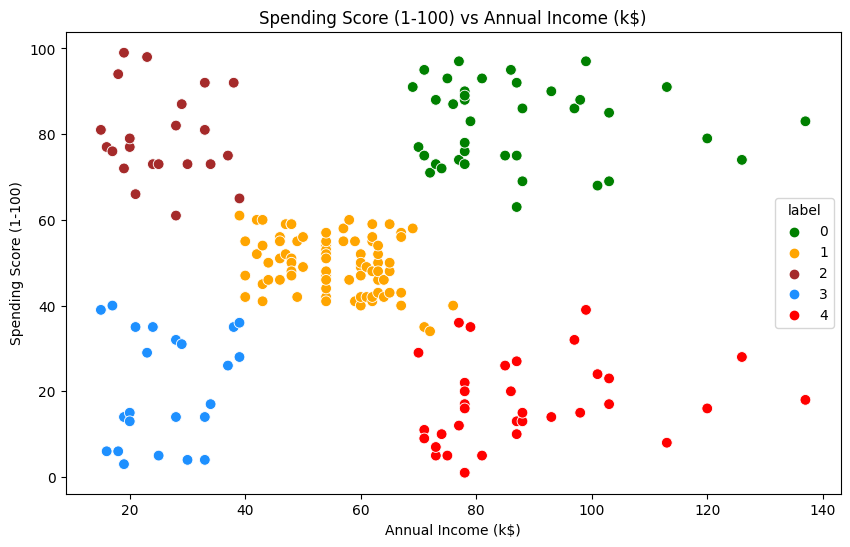

In [21]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
                hue="label", palette = ['green','orange','brown','dodgerblue','red'], legend='full',data = df1 , s = 60)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Calculate performance metrics

In [60]:
# import libraries
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score

y_true = data.cluster

# calculate rand score
rand_score = adjusted_rand_score(y_true, y)

# calculate silhoutte index
sil_score = silhouette_score(X, km1.labels_, metric = 'euclidean')

print('Rand Score =', rand_score)
print('Silhouette Score =', sil_score)

Rand Score = 0.7185662100592287
Silhouette Score = 0.553931997444648
